<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Акопян Изабелла Арменовна
##### Группа:   НБИбд-01-20

## Москва 2023
***

### Вариант №12

#### __Текст задания__:
В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.

2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.

3. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества  R2  двух подходов.

4. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.

5. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака).

6. Используя созданный нормализующий слой, постройте регресоры на базе следующих моделей множественной регрессии:

линейной регрессии
гребневой регрессии (L2)
лассо регрессии (L1)
7. Определите на контрольной выборке модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

8. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

9. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.


------------------------
Лабораторная работа 1 – Вариант 12 

1. Набор данных: wine_quality 

2. Независимая переменная: features/density 

3. Зависимая переменная: features/fixed acidity 

4. Визуализация для независимой переменной – эмпирическая плотность распределения 

5. Визуализация для зависимой переменной – столбчатая диаграмма 

6. Показатель качества регрессии – R^2 (коэффициент детерминации) 

Решение ниже


__Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные.__

In [564]:
import tensorflow_datasets as tfds

In [565]:
ds = tfds.load("wine_quality", split='train') 

ds

<_PrefetchDataset element_spec={'features': {'alcohol': TensorSpec(shape=(), dtype=tf.float32, name=None), 'chlorides': TensorSpec(shape=(), dtype=tf.float32, name=None), 'citric acid': TensorSpec(shape=(), dtype=tf.float32, name=None), 'density': TensorSpec(shape=(), dtype=tf.float32, name=None), 'fixed acidity': TensorSpec(shape=(), dtype=tf.float32, name=None), 'free sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'pH': TensorSpec(shape=(), dtype=tf.float32, name=None), 'residual sugar': TensorSpec(shape=(), dtype=tf.float32, name=None), 'sulphates': TensorSpec(shape=(), dtype=tf.float64, name=None), 'total sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'volatile acidity': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'quality': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

In [566]:
df = tfds.as_dataframe(ds)
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


In [567]:
#df.drop(columns=['quality'],inplace=True) #оценка качества может быть от 0 до 10 всего
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


__Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.__

In [568]:
corr_matrix = df.corr()
corr_matrix

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
features/alcohol,1.000000,-0.360189,-0.075729,-0.780138,-0.120881,-0.250104,0.121432,-0.450631,-0.017433,-0.448892,0.067718,0.435575
features/chlorides,-0.360189,1.000000,0.114364,0.257211,0.023086,0.101392,-0.090439,0.088685,0.016763,0.198910,0.070512,-0.209934
features/citric acid,-0.075729,0.114364,1.000000,0.149503,0.289181,0.094077,-0.163748,0.094212,0.062331,0.121131,-0.149472,-0.009209
features/density,-0.780138,0.257211,0.149503,1.000000,0.265331,0.294210,-0.093592,0.838967,0.074493,0.529881,0.027114,-0.307123
features/fixed acidity,-0.120881,0.023086,0.289181,0.265331,1.000000,-0.049396,-0.425858,0.089021,-0.017143,0.091070,-0.022697,-0.113663
features/free sulfur dioxide,-0.250104,0.101392,0.094077,0.294210,-0.049396,1.000000,-0.000618,0.299098,0.059217,0.615501,-0.097012,0.008158
features/pH,0.121432,-0.090439,-0.163748,-0.093592,-0.425858,-0.000618,1.000000,-0.194133,0.155951,0.002321,-0.031915,0.099427
features/residual sugar,-0.450631,0.088685,0.094212,0.838967,0.089021,0.299098,-0.194133,1.000000,-0.026664,0.401439,0.064286,-0.097577
features/sulphates,-0.017433,0.016763,0.062331,0.074493,-0.017143,0.059217,0.155951,-0.026664,1.000000,0.134562,-0.035728,0.053678
features/total sulfur dioxide,-0.448892,0.198910,0.121131,0.529881,0.091070,0.615501,0.002321,0.401439,0.134562,1.000000,0.089261,-0.174737


In [569]:
import seaborn as sns

<Axes: >

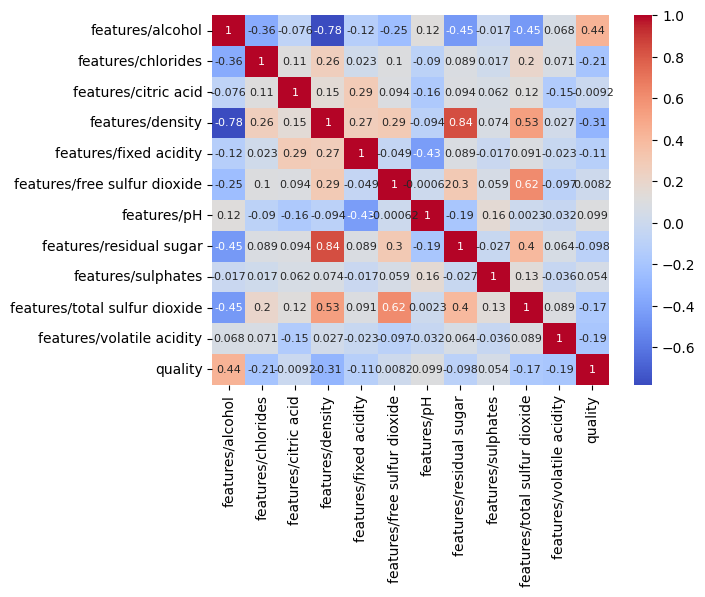

In [570]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size':8}) #для визуализации, так проще


Видим, тут плотность зависит от спирта (чем больше спирта, тем меньше плотность (-0.78)) - по чеддоку корреляция высокая

А диоксид серы (sulfur acidity) можно считать не зависит от меры кислотности (pH) - по Чеддоку вообще нет корреляции

__Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.__

In [571]:
import matplotlib.pyplot as plt

y = features/fixed acidity 

x = features/density 

Визуализация для независимой переменной – эмпирическая плотность распределения 

Визуализация для зависимой переменной – столбчатая диаграмма 

__Эмпирическая (выборочная) плотность распределения (PDF) для x__

# __границы х отредачить*__:

In [574]:
y = df['features/fixed acidity']
x = df['features/density']


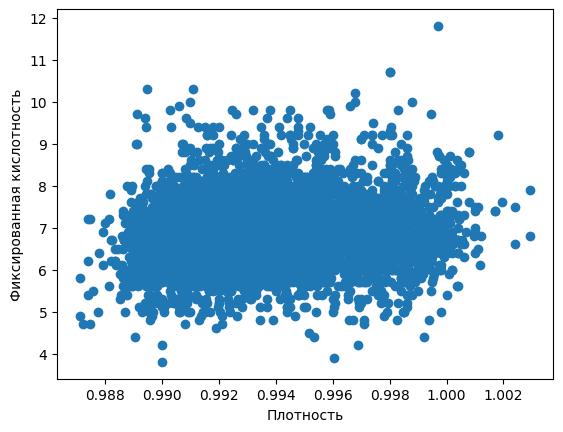

In [575]:
max_num = max(x)
index = list(x).index(max_num)
del x[index] 
del y[index] #убираю выбросы
x = x[x < 1.01]
y = y[y< 13]

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('Плотность')
ax.set_ylabel('Фиксированная кислотность')
plt.show()


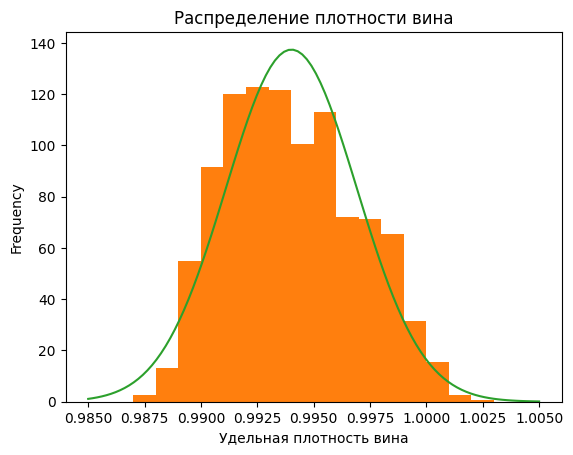

In [576]:
x.plot.hist(density=True, range=[0.985, 1.005], bins = 20).set_xlabel('Удельная плотность вина')
counts, bins, _ = plt.hist(x, density=True, range=[0.985, 1.005], bins=20)
mu = np.mean(x)
sigma = np.std(x)
x_line = np.linspace(bins[0], bins[-1], 100)
y_line = (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-((x_line-mu)**2)/(2*sigma**2))

plt.title('Распределение плотности вина')
plt.plot(x_line, y_line) 

__Столбчатая диаграмма для y__

[Text(0, 0.5, 'Фиксированная кислотность вина'), Text(0.5, 0, 'Индекс вина')]

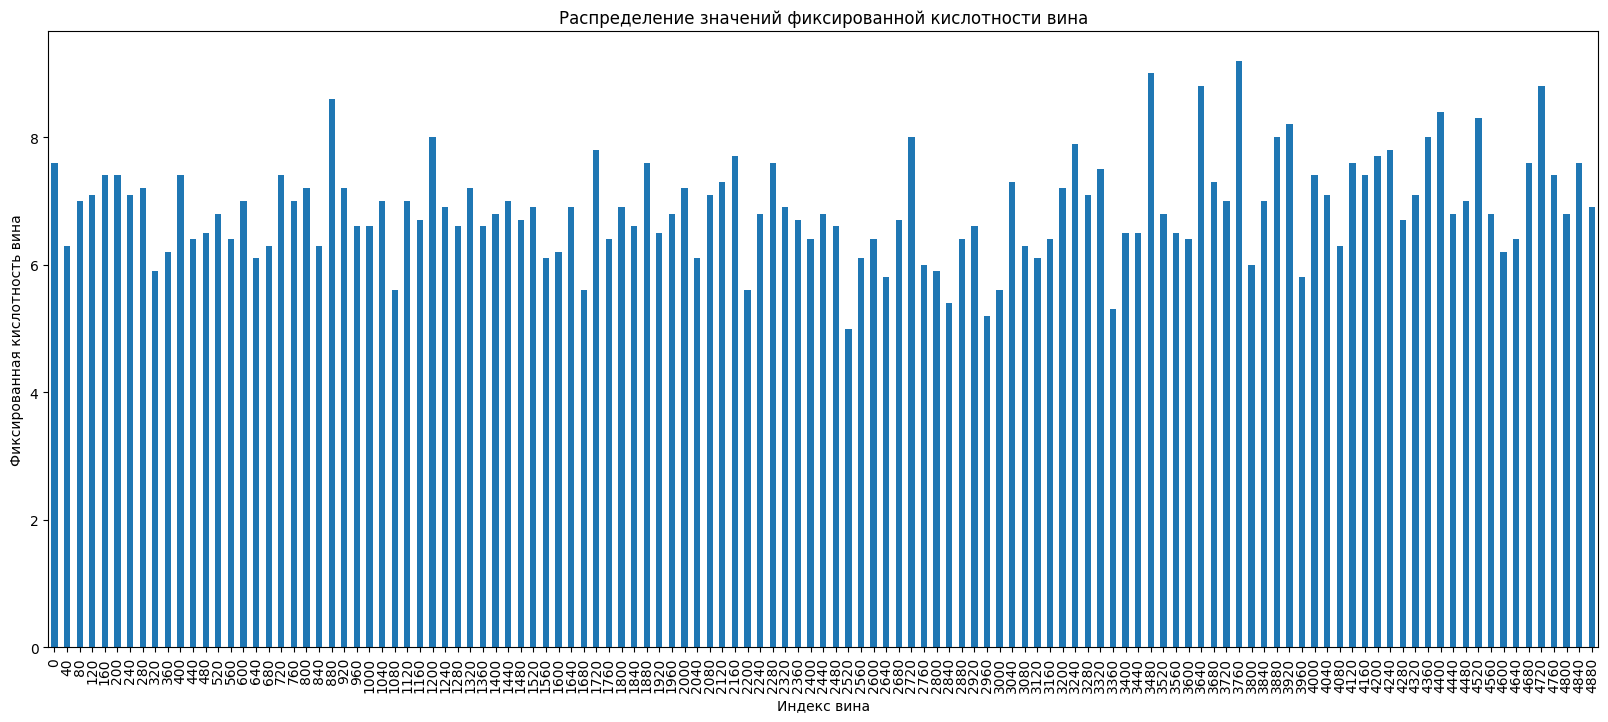

In [577]:
df[::40]['features/fixed acidity'].plot.bar(title='Распределение значений фиксированной кислотности вина', figsize=(20,8)).set(ylabel='Фиксированная кислотность вина', xlabel = 'Индекс вина')

__Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества R2 двух подходов.__

__Показатель качества регрессии – R^2 (коэффициент детерминации)__

In [578]:
import numpy as np
import pandas as pd

In [579]:
!pip install Sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [580]:
from sklearn.model_selection import train_test_split


In [581]:


x_train,x_test,y_train,y_test = train_test_split(x, y,  test_size=0.20, random_state=42)
x_train,x_test,y_train,y_test

(3399    0.99541
 843     1.00030
 3378    0.99210
 4012    0.99230
 4432    0.99510
          ...   
 4429    0.99350
 466     0.99370
 3095    0.99066
 3775    0.99166
 860     0.99264
 Name: features/density, Length: 3916, dtype: float32,
 144     0.99380
 79      0.99410
 4631    0.99711
 3836    0.99100
 3851    0.99724
          ...   
 964     0.99200
 168     0.99454
 3660    0.98916
 3641    0.99700
 4485    0.99397
 Name: features/density, Length: 979, dtype: float32,
 3399    7.8
 844     8.0
 3378    8.0
 4012    7.5
 4432    8.2
        ... 
 4429    6.8
 467     5.1
 3095    6.3
 3775    8.8
 861     6.4
 Name: features/fixed acidity, Length: 3916, dtype: float32,
 145     6.7
 79      7.5
 4631    7.5
 3836    6.1
 3851    6.4
        ... 
 965     8.2
 169     6.7
 3660    5.9
 3641    6.8
 4485    7.1
 Name: features/fixed acidity, Length: 979, dtype: float32)

In [582]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [584]:
x = np.array(x.values).reshape(-1, 1)
y = np.array(y.values).reshape(-1, 1)

In [585]:
#коэффициент регрессии
a = float((x - x_mean).T.dot(y - y_mean) / (x - x_mean).T.dot(x - x_mean))
#коэффициент смещения
b = float(y_mean - a * x_mean)
a, b

(35.247093200683594, -28.18313578046127)

array([[7.6],
       [6.3],
       [5.3],
       ...,
       [8.1],
       [6.8],
       [6.6]], dtype=float32)

In [586]:
y_hat = a * x + b
y_hat

array([[7.0921555],
       [6.7502594],
       [6.7382736],
       ...,
       [7.023777 ],
       [7.1679344],
       [6.730522 ]], dtype=float32)

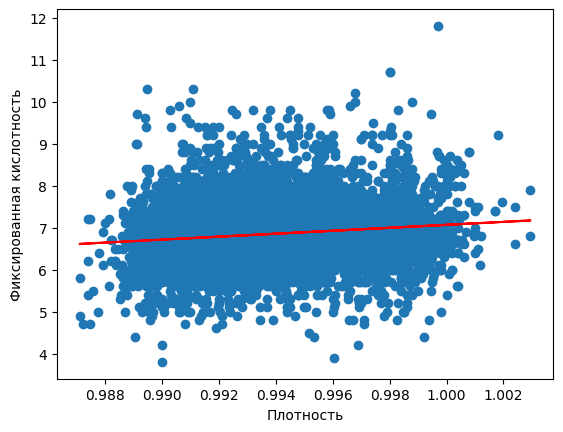

In [649]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.plot(x, y_hat, color='r')

ax.set_xlabel('Плотность')
ax.set_ylabel('Фиксированная кислотность')
plt.show()

In [588]:
x_predict = 1.005
y_predict = a * x_predict + b
y_predict

7.240192886225735

In [589]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

In [590]:
reg1 = SimpleLinReg()
reg1

SimpleLinearReg()

In [591]:
x

array([[1.0008 ],
       [0.9911 ],
       [0.99076],
       ...,
       [0.99886],
       [1.00295],
       [0.99054]], dtype=float32)

In [593]:
reg1.fit(x.ravel(), y)
reg1.predict(np.array([x_predict]))

array([[7.2401905]], dtype=float32)

In [594]:
reg1.a_, reg1.b_

(array([35.247093], dtype=float32), array([-28.183138], dtype=float32))

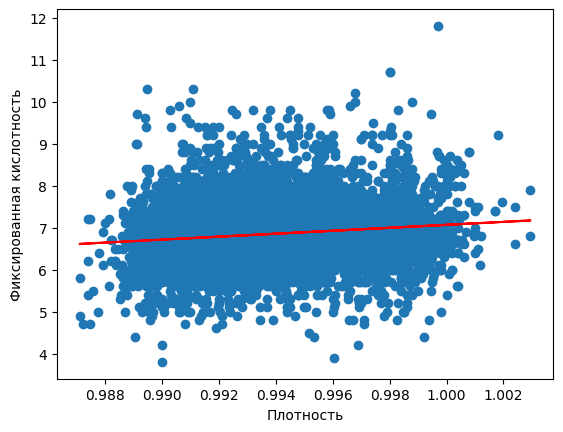

In [651]:
y_hat1 = reg1.predict(x.ravel())

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.plot(x, y_hat1, color='r')

ax.set_xlabel('Плотность')
ax.set_ylabel('Фиксированная кислотность')
plt.show()

In [597]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3916,), (3916,), (979,), (979,))

In [598]:
df_train = pd.DataFrame(x_train)
df_train

,features/density
3399,0.99541
843,1.00030
3378,0.99210
4012,0.99230
4432,0.99510
...,...
4429,0.99350
466,0.99370
3095,0.99066
3775,0.99166


In [599]:

x_train.shape, y_train.shape


((3916,), (3916,))

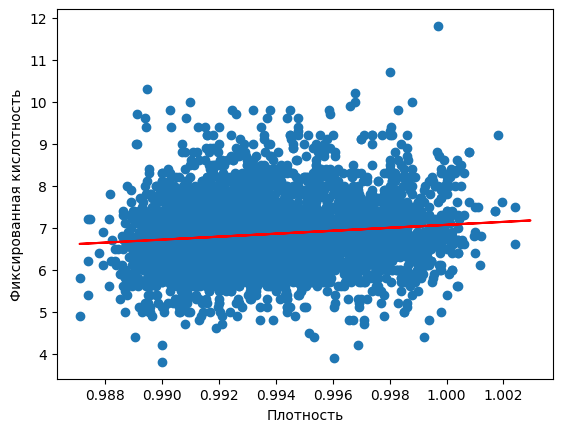

In [652]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train)
plt.plot(x, y_hat, color='r')

ax.set_xlabel('Плотность')
ax.set_ylabel('Фиксированная кислотность')
plt.show()
#набор переменных для парной регрессии

In [612]:
reg = SimpleLinReg()
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
reg.fit(x_train.ravel(), y_train.ravel())

SimpleLinearReg()

In [613]:
reg.a_, reg.b_

(32.399338, -25.350012)

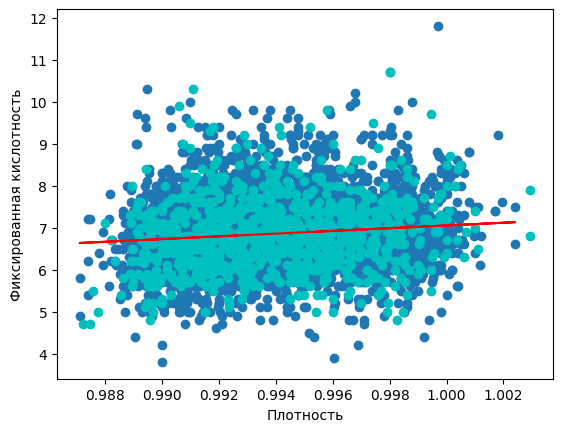

In [655]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="c")
plt.plot(x_train, reg.predict(x_train.ravel()), color='r');
ax.set_xlabel('Плотность')
ax.set_ylabel('Фиксированная кислотность')
plt.show()

In [618]:
y_predict = reg.predict(x_test)
y_predict

array([6.84844955, 6.85816903, 6.95569215, 6.75773179, 6.959904  ,
       6.71204849, 6.93722456, 6.79013072, 6.9650872 , 6.79661166,
       6.96832768, 6.78203147, 6.93657569, 6.69098928, 6.7612967 ,
       6.77004288, 6.79596279, 6.7836517 , 6.70718971, 6.99457202,
       6.8034151 , 6.81605062, 6.88084847, 6.77846656, 6.87307365,
       6.845211  , 6.76680434, 6.78041123, 6.86789044, 7.05256641,
       6.73699703, 6.79402005, 6.90158517, 6.78041123, 6.87760993,
       6.91227602, 6.80957161, 6.70783665, 6.79661166, 6.87955266,
       6.80244373, 6.8218827 , 6.9845281 , 6.95860819, 6.79013072,
       6.68159423, 6.90806418, 6.75773179, 6.70654084, 6.89056988,
       6.90547257, 6.88732941, 6.80309067, 6.93592876, 6.70394924,
       6.85169002, 6.87436945, 6.76712684, 6.97156815, 6.81410596,
       6.81281015, 6.91972833, 6.99165598, 6.76550854, 6.9391673 ,
       6.68936905, 6.8640011 , 6.82577011, 6.69908853, 6.79013072,
       6.7836517 , 7.03182971, 7.02923811, 6.71885193, 6.73667

In [632]:
from sklearn.metrics import r2_score
def check_R2(y_test, y_predict):
  return f'R^2 : {r2_score(y_test, y_predict)}'


при помощи нейронной сети:

In [620]:
import tensorflow as tf

In [621]:
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=[1]) ] )

In [622]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [638]:
from keras import backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_total = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_total + K.epsilon()))

model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=[r_squared]
)
#R2

In [639]:
model.fit(x_train, y_train, epochs=200) # verbose=0  процесс обучения будет скрыт и не будет отображаться в выводе

Epoch 1/200
123/123 [==============================] - 1s 2ms/step - loss: 0.6602 - r_squared: -0.1042
Epoch 2/200
123/123 [==============================] - 0s 2ms/step - loss: 0.6460 - r_squared: -0.0548
Epoch 3/200
123/123 [==============================] - 0s 1ms/step - loss: 0.6510 - r_squared: -0.0663
Epoch 4/200
123/123 [==============================] - 0s 2ms/step - loss: 0.6570 - r_squared: -0.0992
Epoch 5/200
123/123 [==============================] - 0s 2ms/step - loss: 0.6517 - r_squared: -0.0682
Epoch 6/200
123/123 [==============================] - 0s 2ms/step - loss: 0.6637 - r_squared: -0.1187
Epoch 7/200
123/123 [==============================] - 0s 2ms/step - loss: 0.6597 - r_squared: -0.0995
Epoch 8/200
123/123 [==============================] - 0s 2ms/step - loss: 0.6618 - r_squared: -0.1254
Epoch 9/200
123/123 [==============================] - 0s 2ms/step - loss: 0.6515 - r_squared: -0.0793
Epoch 10/200
123/123 [==============================] - 0s 2ms/step - los

Выполним прогнозирование значений зависимой переменной (отклика)

In [640]:
y_predict2 = model.predict(x_test).flatten()

y_predict2

31/31 [==============================] - 0s 1ms/step


array([6.9306364, 6.9329967, 6.956676 , 6.9086094, 6.957699 , 6.897517 ,
       6.952192 , 6.9164762, 6.958957 , 6.91805  , 6.959744 , 6.91451  ,
       6.9520345, 6.8924036, 6.909475 , 6.9115987, 6.9178925, 6.914903 ,
       6.8963375, 6.9661164, 6.9197016, 6.92277  , 6.9385033, 6.913644 ,
       6.9366155, 6.92985  , 6.9108124, 6.9141164, 6.935357 , 6.980198 ,
       6.903575 , 6.9174204, 6.943538 , 6.9141164, 6.937717 , 6.946134 ,
       6.9211965, 6.8964944, 6.91805  , 6.9381886, 6.919466 , 6.9241858,
       6.9636774, 6.957384 , 6.9164762, 6.8901224, 6.9451118, 6.9086094,
       6.8961797, 6.9408636, 6.9444823, 6.940077 , 6.919623 , 6.951877 ,
       6.8955507, 6.931423 , 6.93693  , 6.9108906, 6.9605308, 6.9222975,
       6.921983 , 6.9479437, 6.9654083, 6.9104977, 6.9526634, 6.89201  ,
       6.9344125, 6.92513  , 6.8943706, 6.9164762, 6.914903 , 6.975163 ,
       6.9745336, 6.899169 , 6.9034963, 6.9274898, 6.902316 , 6.9424367,
       6.913723 , 6.9605308, 6.9204097, 6.9380317, 

__Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.__

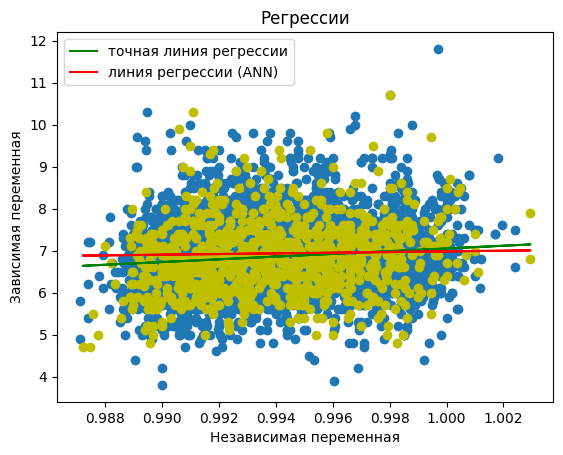

In [663]:
fig, ax = plt.subplots()

ax.scatter(x_train, y_train)
ax.scatter(x_test, y_test, c='y')
ax.plot(x_test, y_predict, c='g', label='точная линия регрессии')
ax.plot(x_test, y_predict2, c='r', label='линия регрессии (ANN)')
ax.set_xlabel('Независимая переменная')
ax.set_ylabel('Зависимая переменная')
plt.title('Регрессии')
ax.legend();


1 - mse_test/np.var(y_test)
коэффициент детерминации, по нему сравню модели

In [643]:
check_R2(y_test, y_predict2)

'R^2 : -0.003529112481851282'

In [644]:
check_R2(y_test, y_predict)

'R^2 : 0.023532034816775127'

In [ ]:
import seaborn as sns
sns.scatterplot(x="total_bill", y="tip", data=tips, xlabel="Total Bill", ylabel="Tip Amount", legend="full")